In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('comparisons.csv')

In [12]:
# Prepare the data
# Convert numbers to scientific notation
data['as'] = data['as'].apply(lambda x: '{:.2e}'.format(x))
#data['as_2'] = data['as'].apply(lambda x: float(x.split('e')[1]))
data['as'] = data['as'].apply(lambda x: float(x))

# At diff_2, zeros should look like having a negative exponent


# Convert numbers to scientific notation
data['r'] = data['r'].apply(lambda x: '{:.2e}'.format(x))
data['r'] = data['r'].apply(lambda x: float(x))

# Convert numbers to scientific notation
data['stan'] = data['stan'].apply(lambda x: '{:.2e}'.format(x))
data['stan'] = data['stan'].apply(lambda x: float(x))

# Convert numbers to scientific notation
data['err'] = data['err'].apply(lambda x: '{:.2e}'.format(x))
data['err'] = data['err'].apply(lambda x: float(x))

# Convert numbers to scientific notation
data['R-STAN'] = data['R-STAN'].apply(lambda x: '{:.2e}'.format(x))
data['R-STAN'] = data['R-STAN'].apply(lambda x: float(x))

# Convert numbers to scientific notation
data['R-AS'] = data['R-AS'].apply(lambda x: '{:.2e}'.format(x))
data['R-AS'] = data['R-AS'].apply(lambda x: float(x))

# Convert numbers to scientific notation
data['STAN-AS'] = data['STAN-AS'].apply(lambda x: '{:.2e}'.format(x))
data['STAN-AS'] = data['STAN-AS'].apply(lambda x: float(x))

# Obter os valores únicos de gamma
unique_gamma = data['gamma'].unique()

print(data.head())


   alfa  beta   gamma  t0  t1     as     r  stan           err        R-STAN  \
0 -10.0 -10.0   0.100   0   1   1.79  50.9  50.9  5.680000e-14  7.110000e-15   
1 -10.0 -10.0   2.575   0   1 -11.50  48.4  48.4  5.380000e-14  1.420000e-14   
2 -10.0 -10.0   5.050   0   1 -20.00  46.0  46.0  5.100000e-14  0.000000e+00   
3 -10.0 -10.0   7.525   0   1 -27.10  43.5  43.5  4.830000e-14  7.110000e-15   
4 -10.0 -10.0  10.000   0   1 -33.20  41.0  41.0  4.550000e-14 -7.110000e-15   

   R-AS  STAN-AS  
0  49.1     49.1  
1  59.9     59.9  
2  66.0     66.0  
3  70.5     70.5  
4  74.2     74.2  


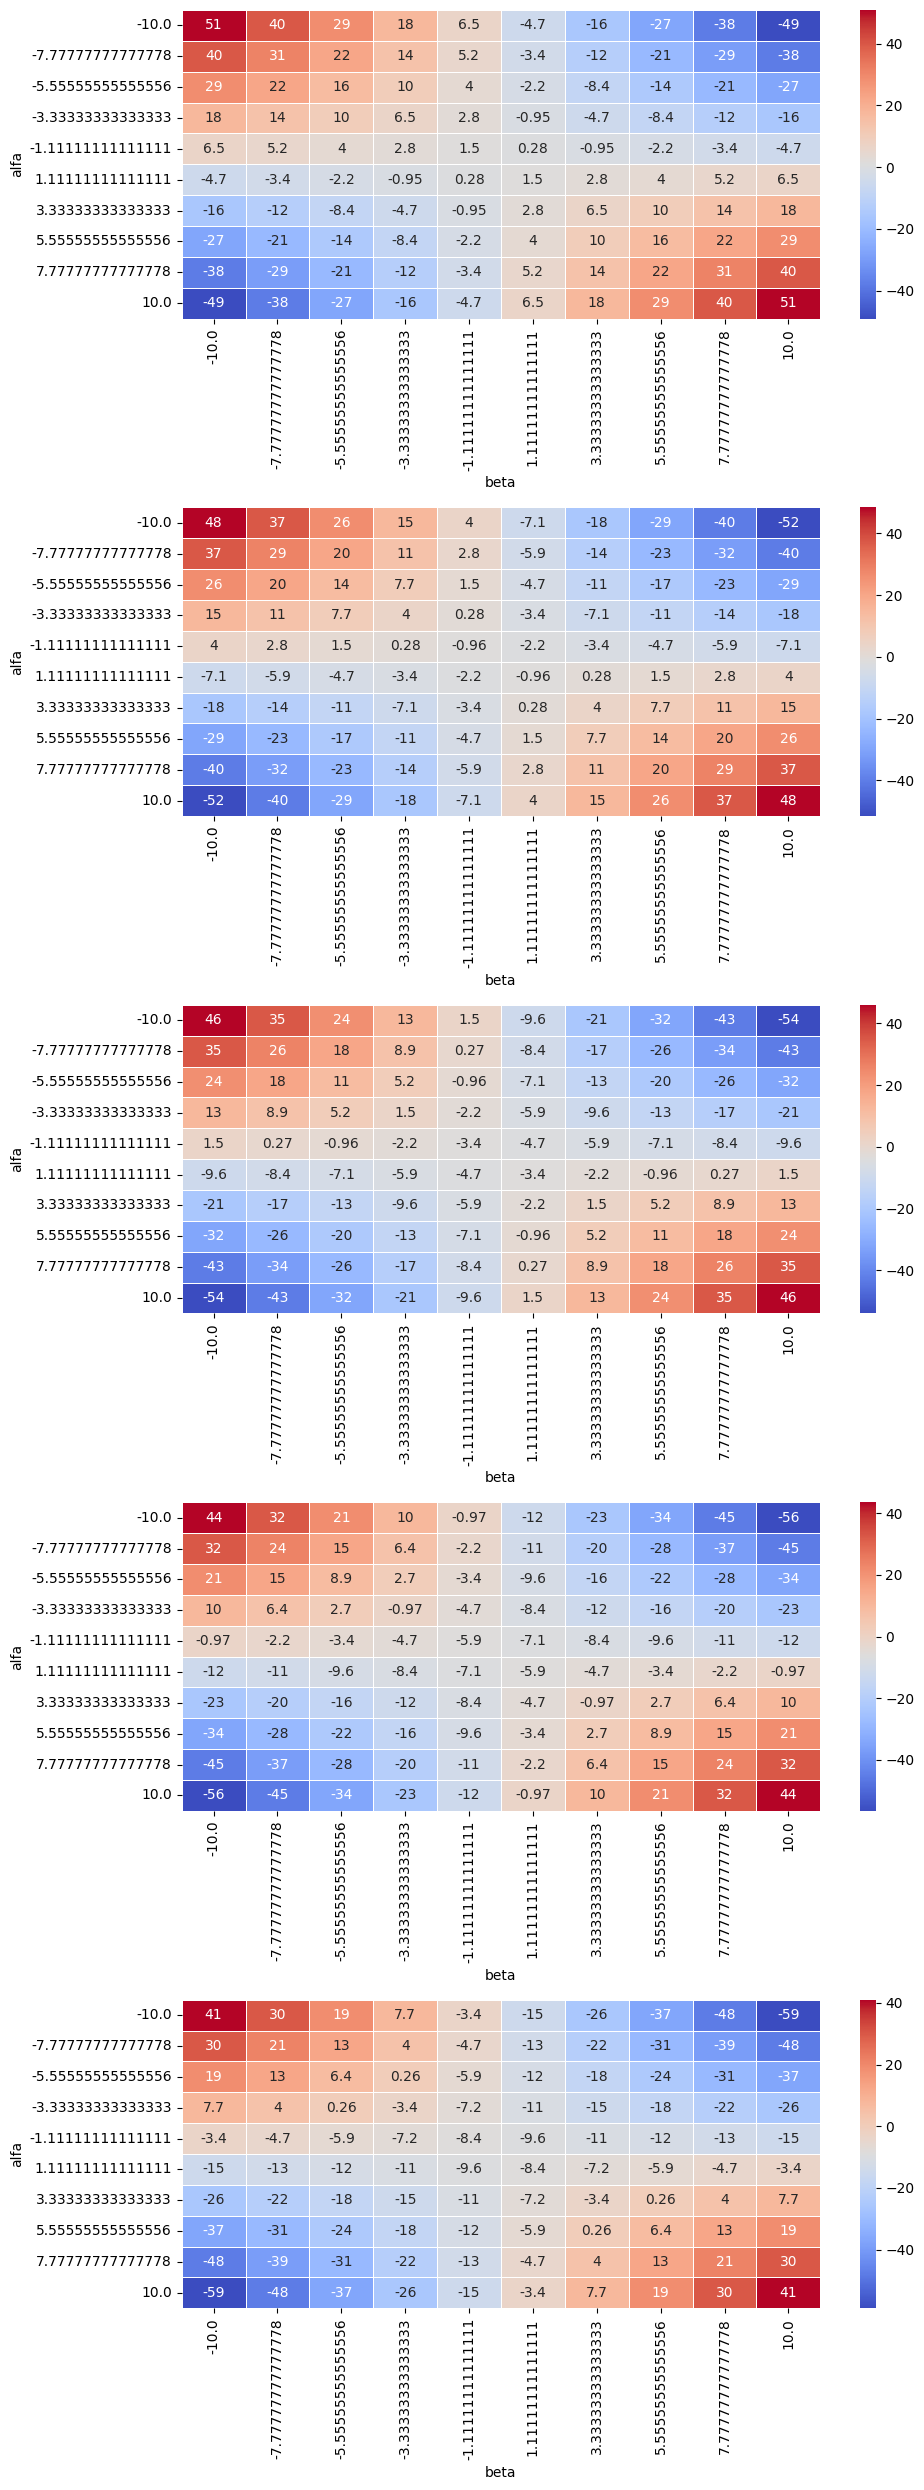

In [13]:
# Define the number of subplots based on the number of unique gamma values
num_subplots = len(unique_gamma)

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='r')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
fig.savefig('r.png')

# Display the plot
plt.show()

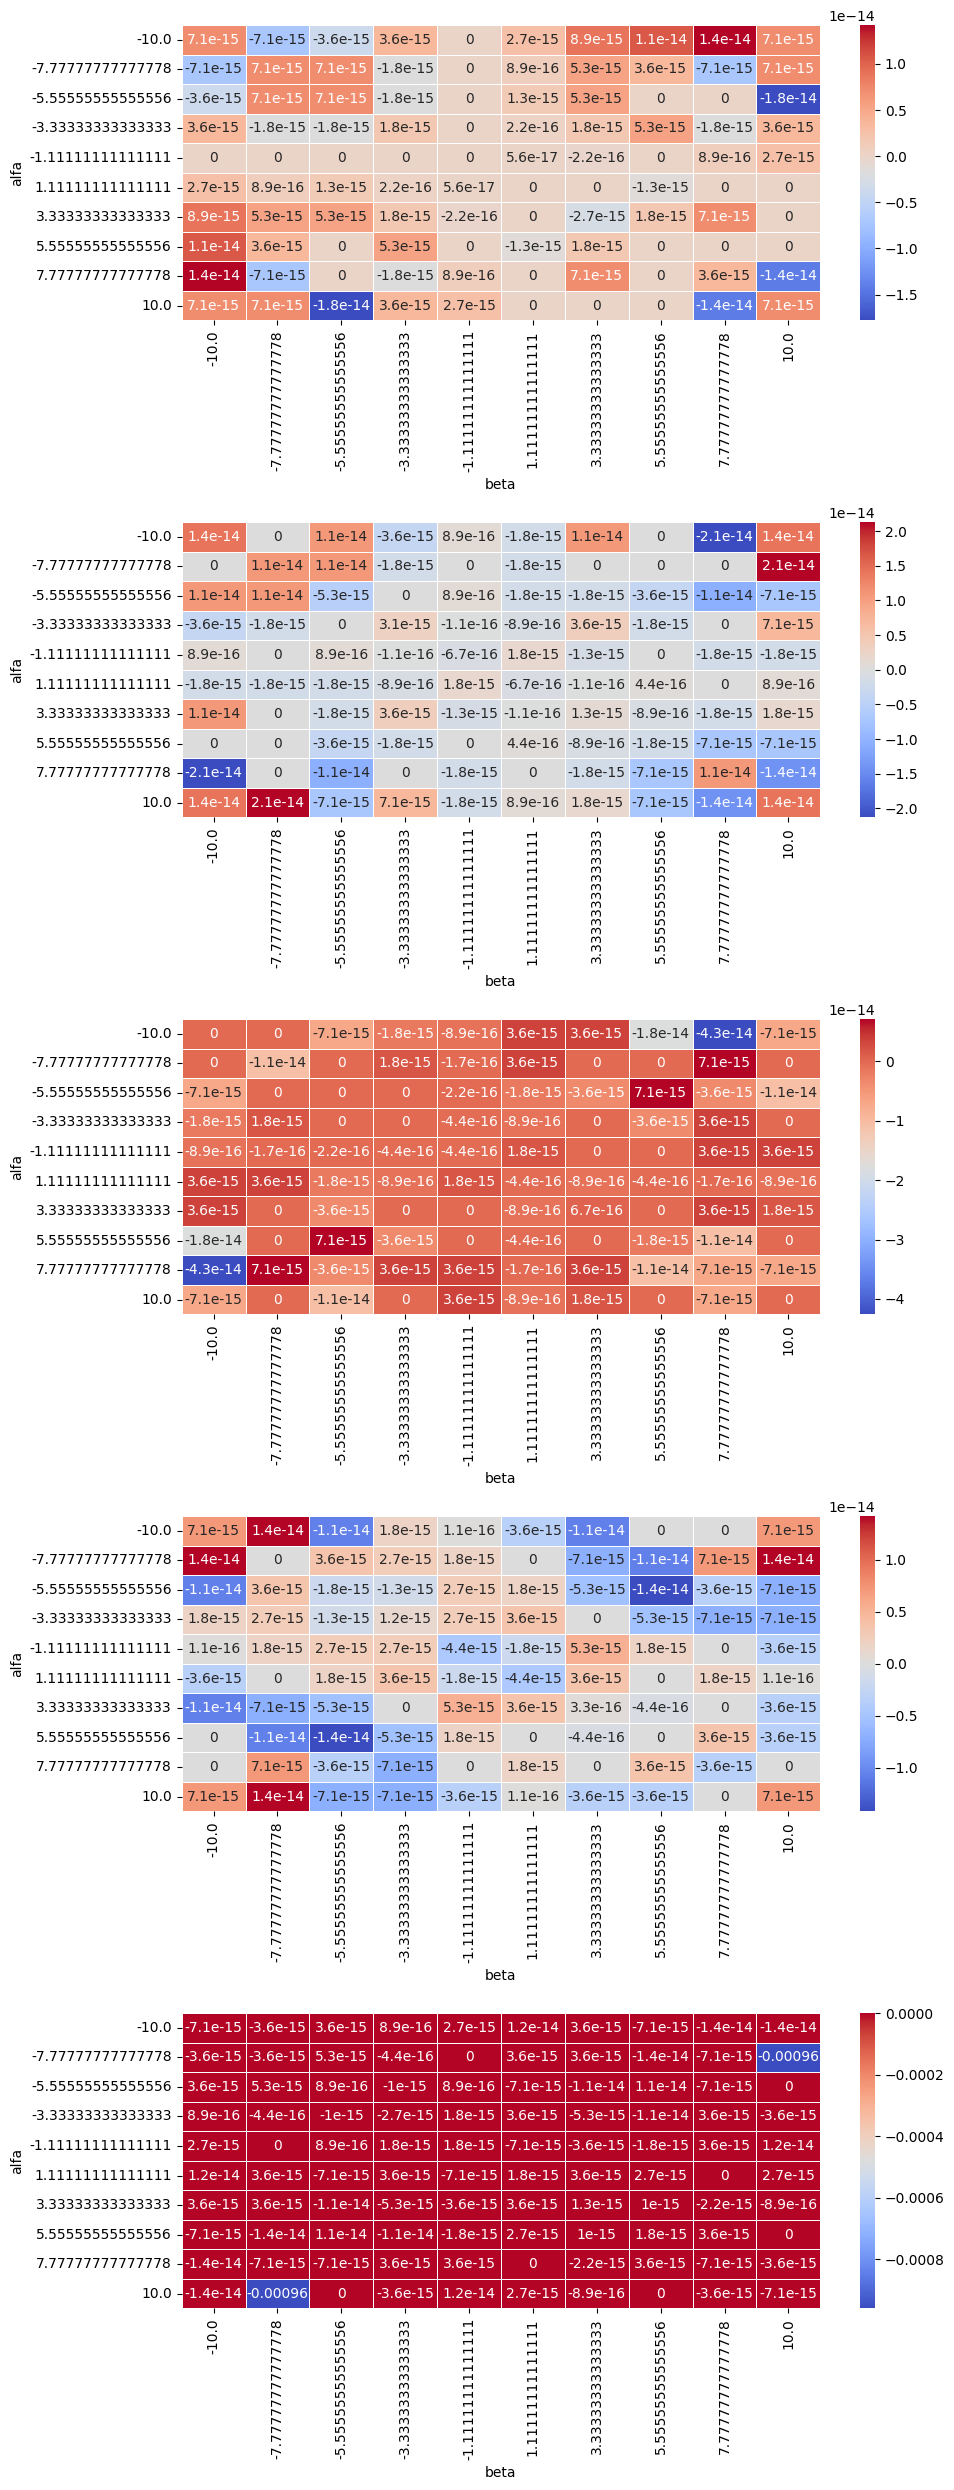

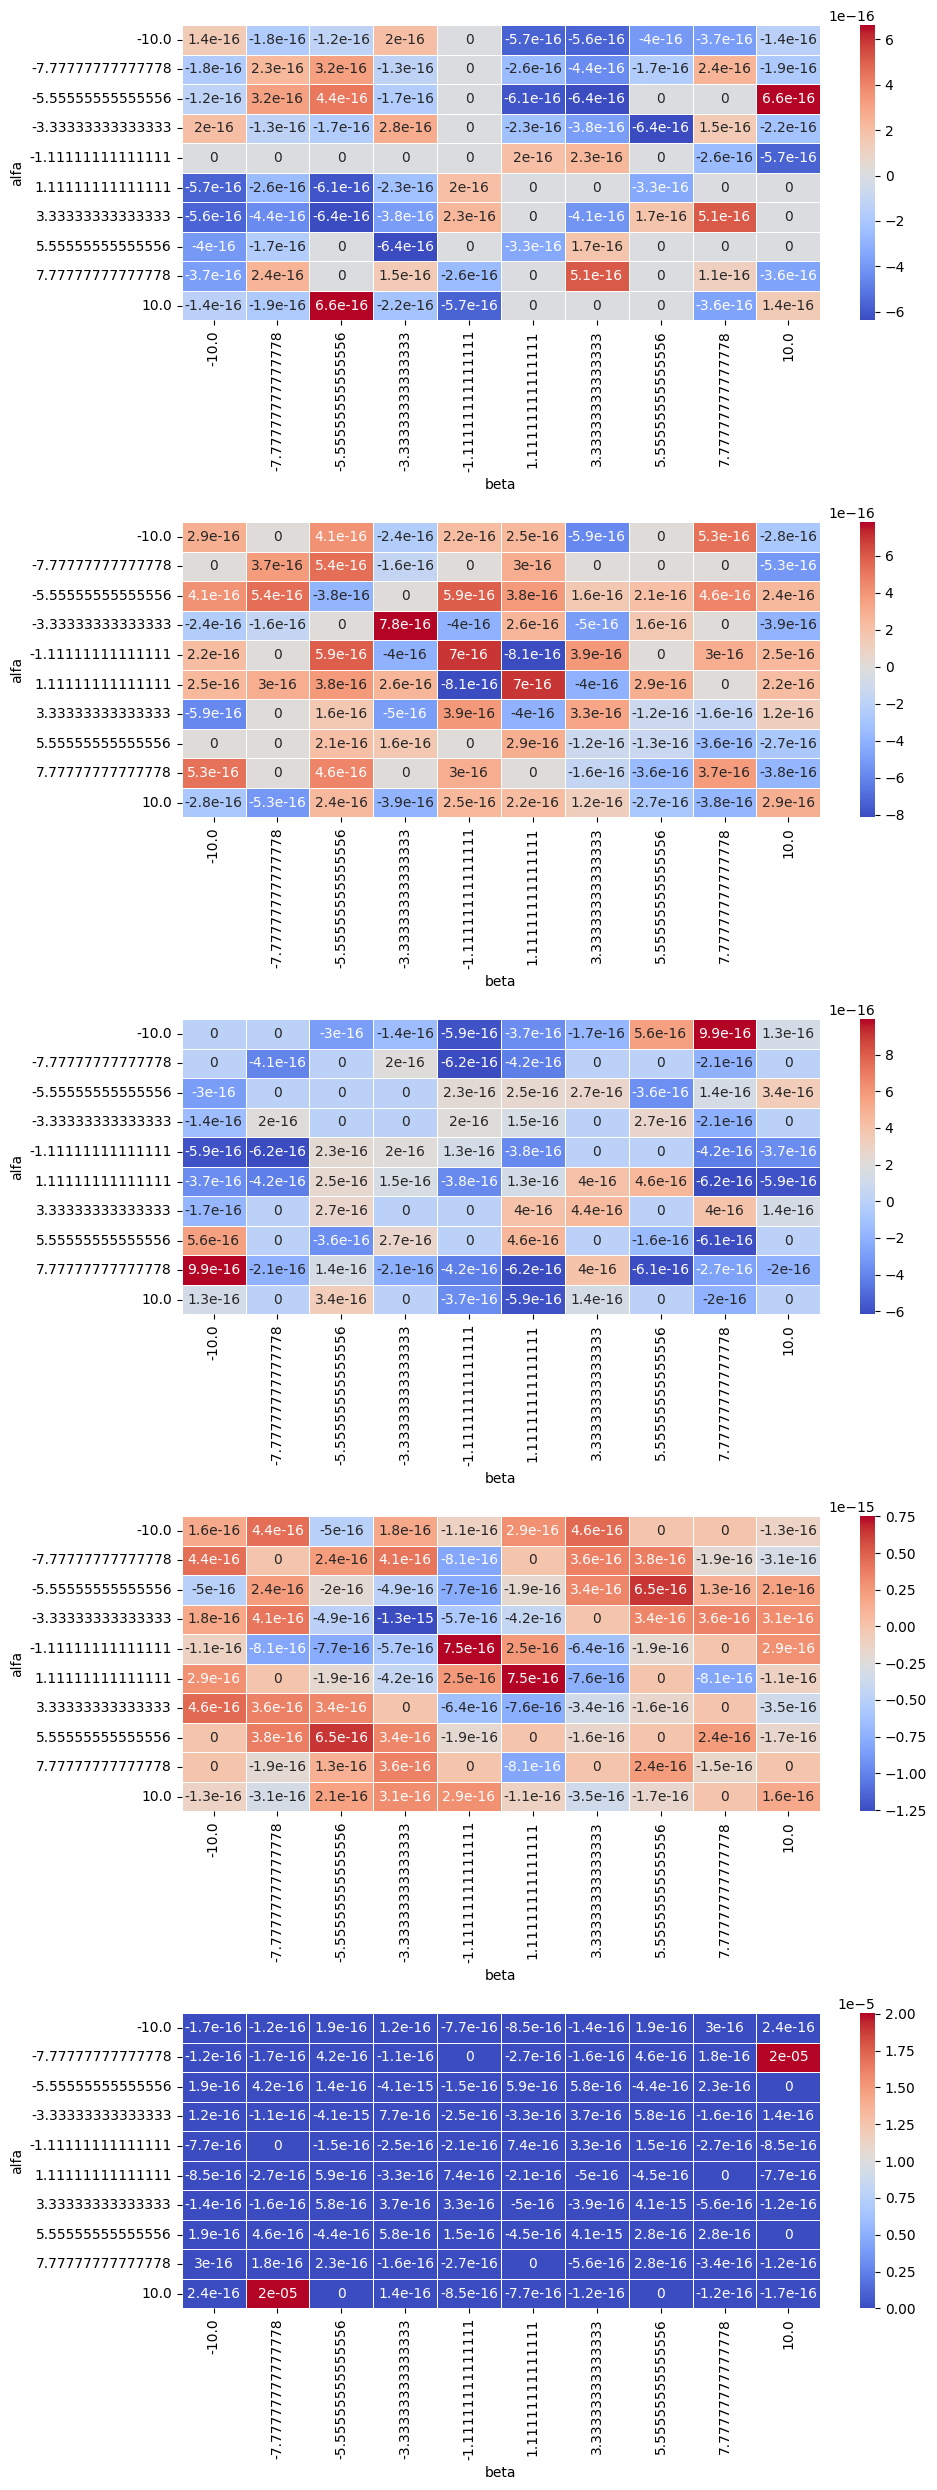

In [14]:
data['magnitude'] = data['R-STAN']/data['r']
# Define the number of subplots based on the number of unique gamma values
num_subplots = len(unique_gamma)

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='R-STAN')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
fig.savefig('diff.png')

# Display the plot
plt.show()

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='magnitude')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
fig.savefig('diff.png')

# Display the plot
plt.show()

   alfa  beta   gamma  t0  t1     as     r  stan   err        R-STAN  R-AS  \
0 -10.0 -10.0   0.100   0   1   1.79  50.9  50.9 -14.0  7.110000e-15  49.1   
1 -10.0 -10.0   2.575   0   1 -11.50  48.4  48.4 -14.0  1.420000e-14  59.9   
2 -10.0 -10.0   5.050   0   1 -20.00  46.0  46.0 -14.0  0.000000e+00  66.0   
3 -10.0 -10.0   7.525   0   1 -27.10  43.5  43.5 -14.0  7.110000e-15  70.5   
4 -10.0 -10.0  10.000   0   1 -33.20  41.0  41.0 -14.0 -7.110000e-15  74.2   

   STAN-AS  magnitude        mod     err_n  
0     49.1  27.430168  27.430168 -0.275049  
1     59.9  -5.208696   5.208696 -0.289256  
2     66.0  -3.300000   3.300000 -0.304348  
3     70.5  -2.601476   2.601476 -0.321839  
4     74.2  -2.234940   2.234940 -0.341463  


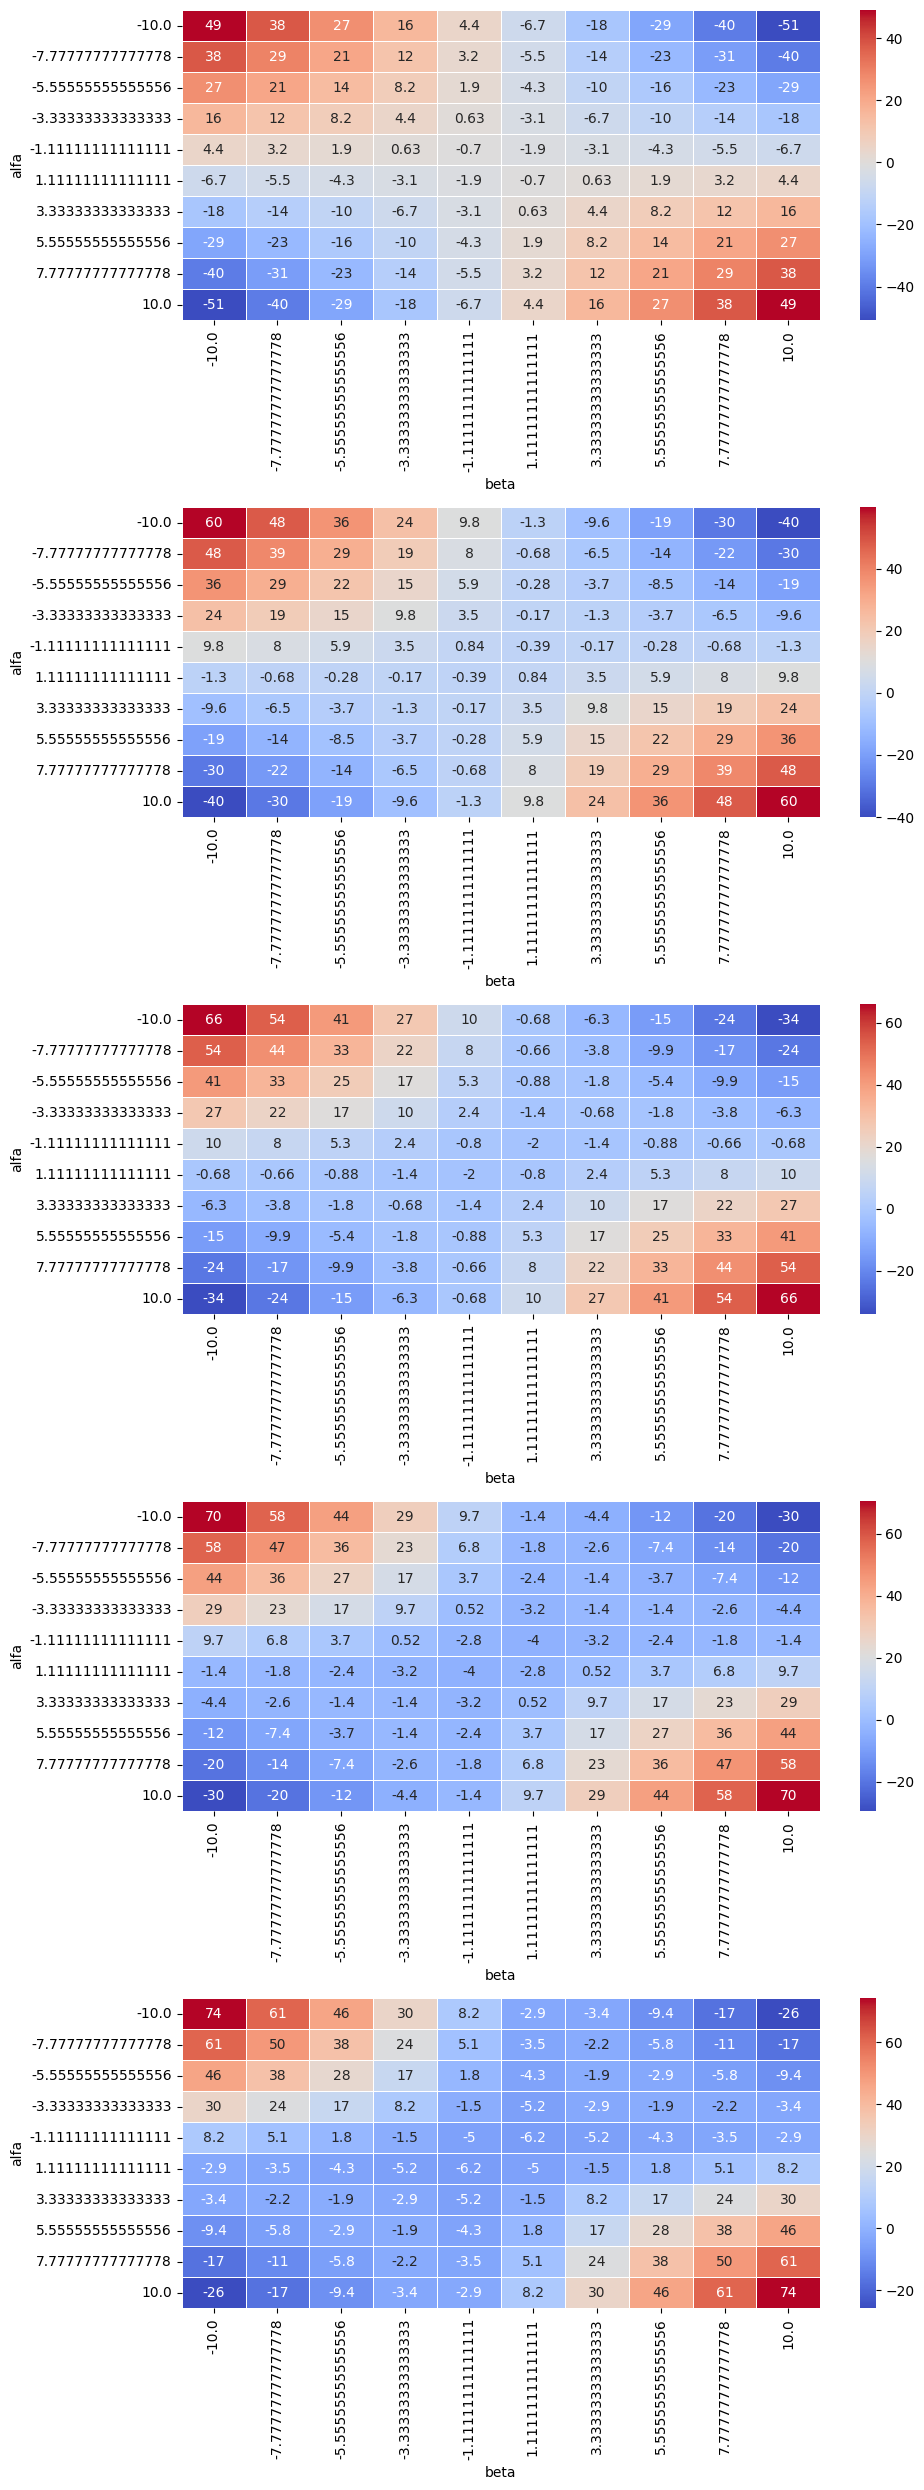

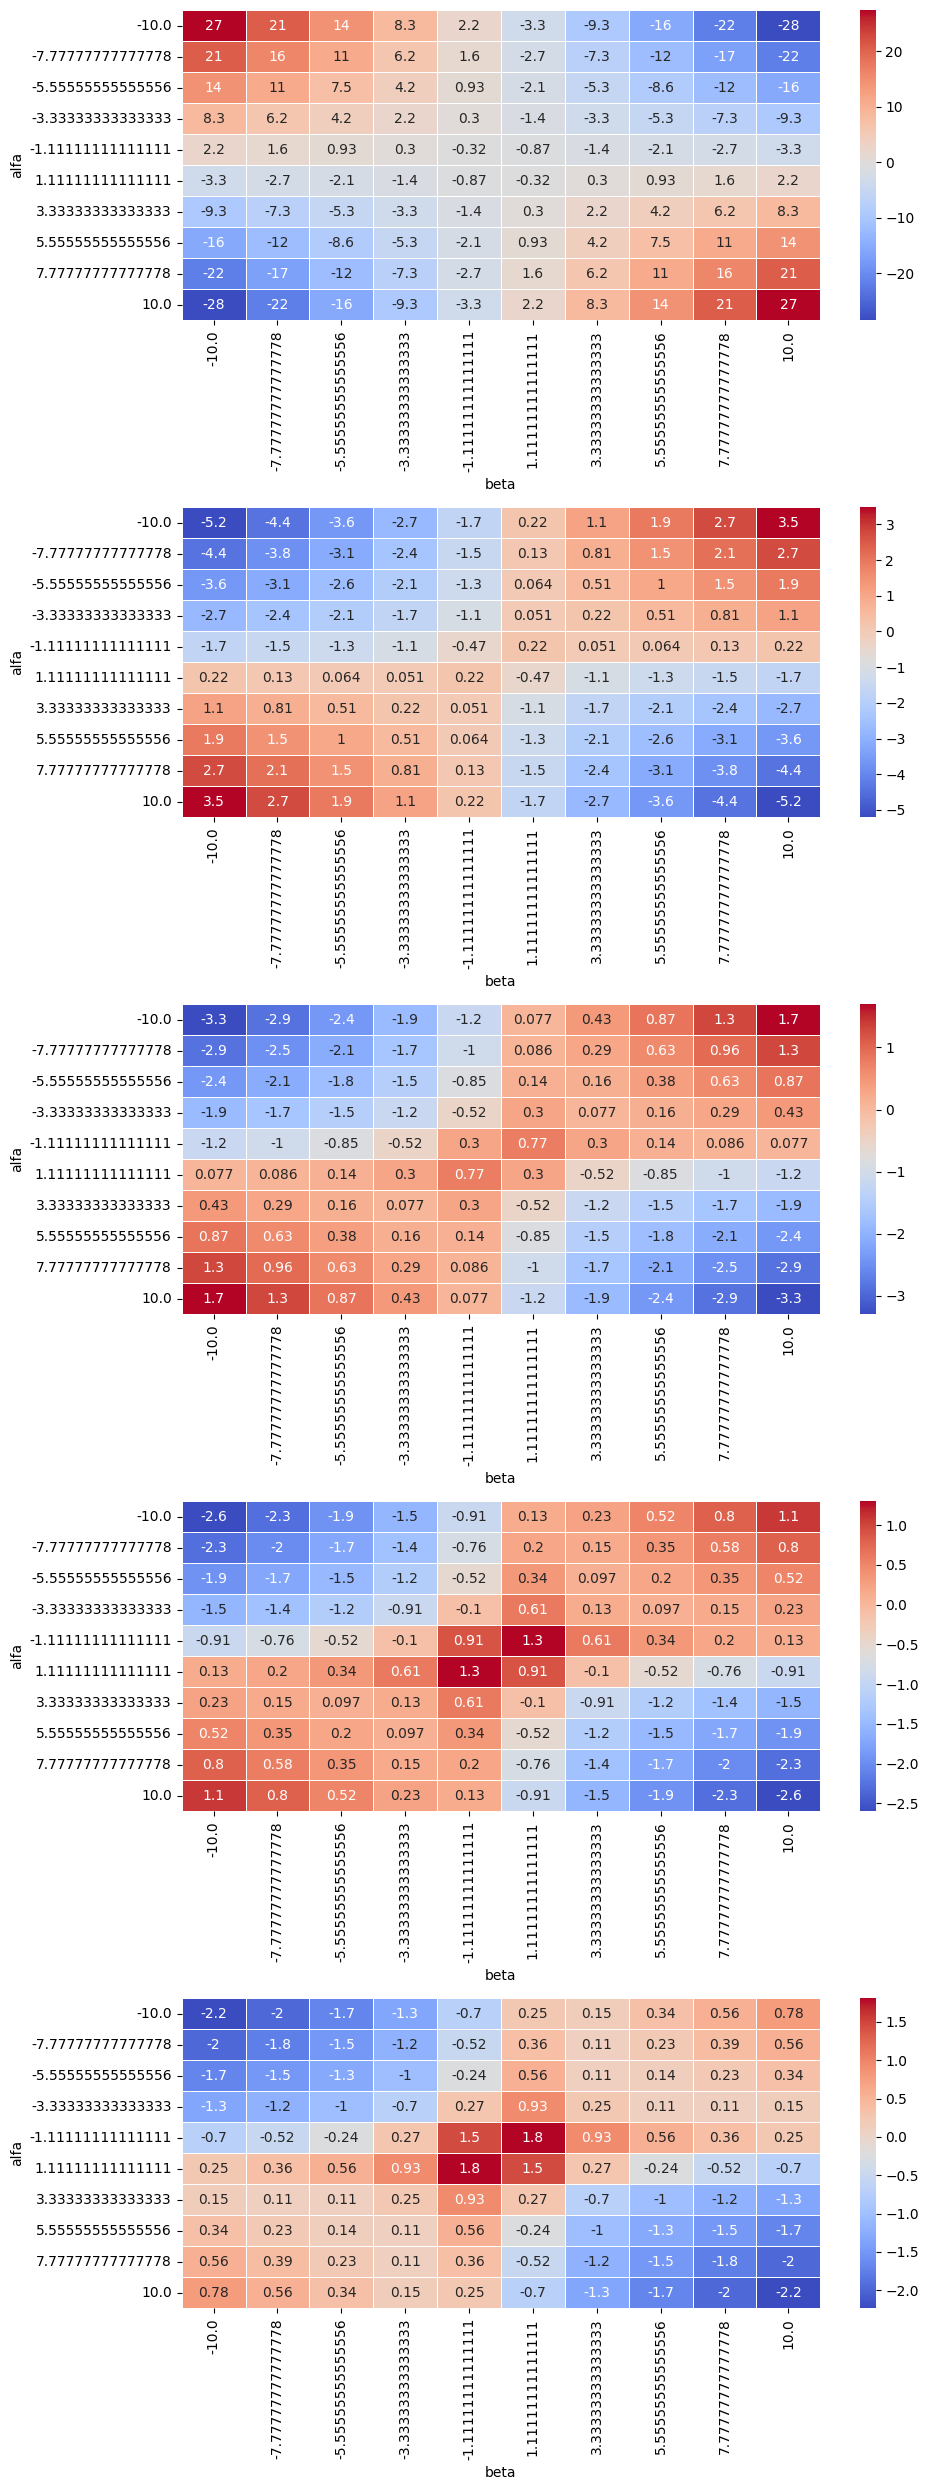

In [20]:
data['magnitude'] = data['R-AS']/data['as']
print(data.head())

# Define the number of subplots based on the number of unique gamma values
num_subplots = len(unique_gamma)

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='R-AS')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
fig.savefig('magnitude.png')

# Display the plot
plt.show()

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='magnitude')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
fig.savefig('magnitude.png')

# Display the plot
plt.show()

In [16]:
duplicates = data.duplicated()
print(data[duplicates])

Empty DataFrame
Columns: [alfa, beta, gamma, t0, t1, as, r, stan, err, R-STAN, R-AS, STAN-AS, magnitude]
Index: []


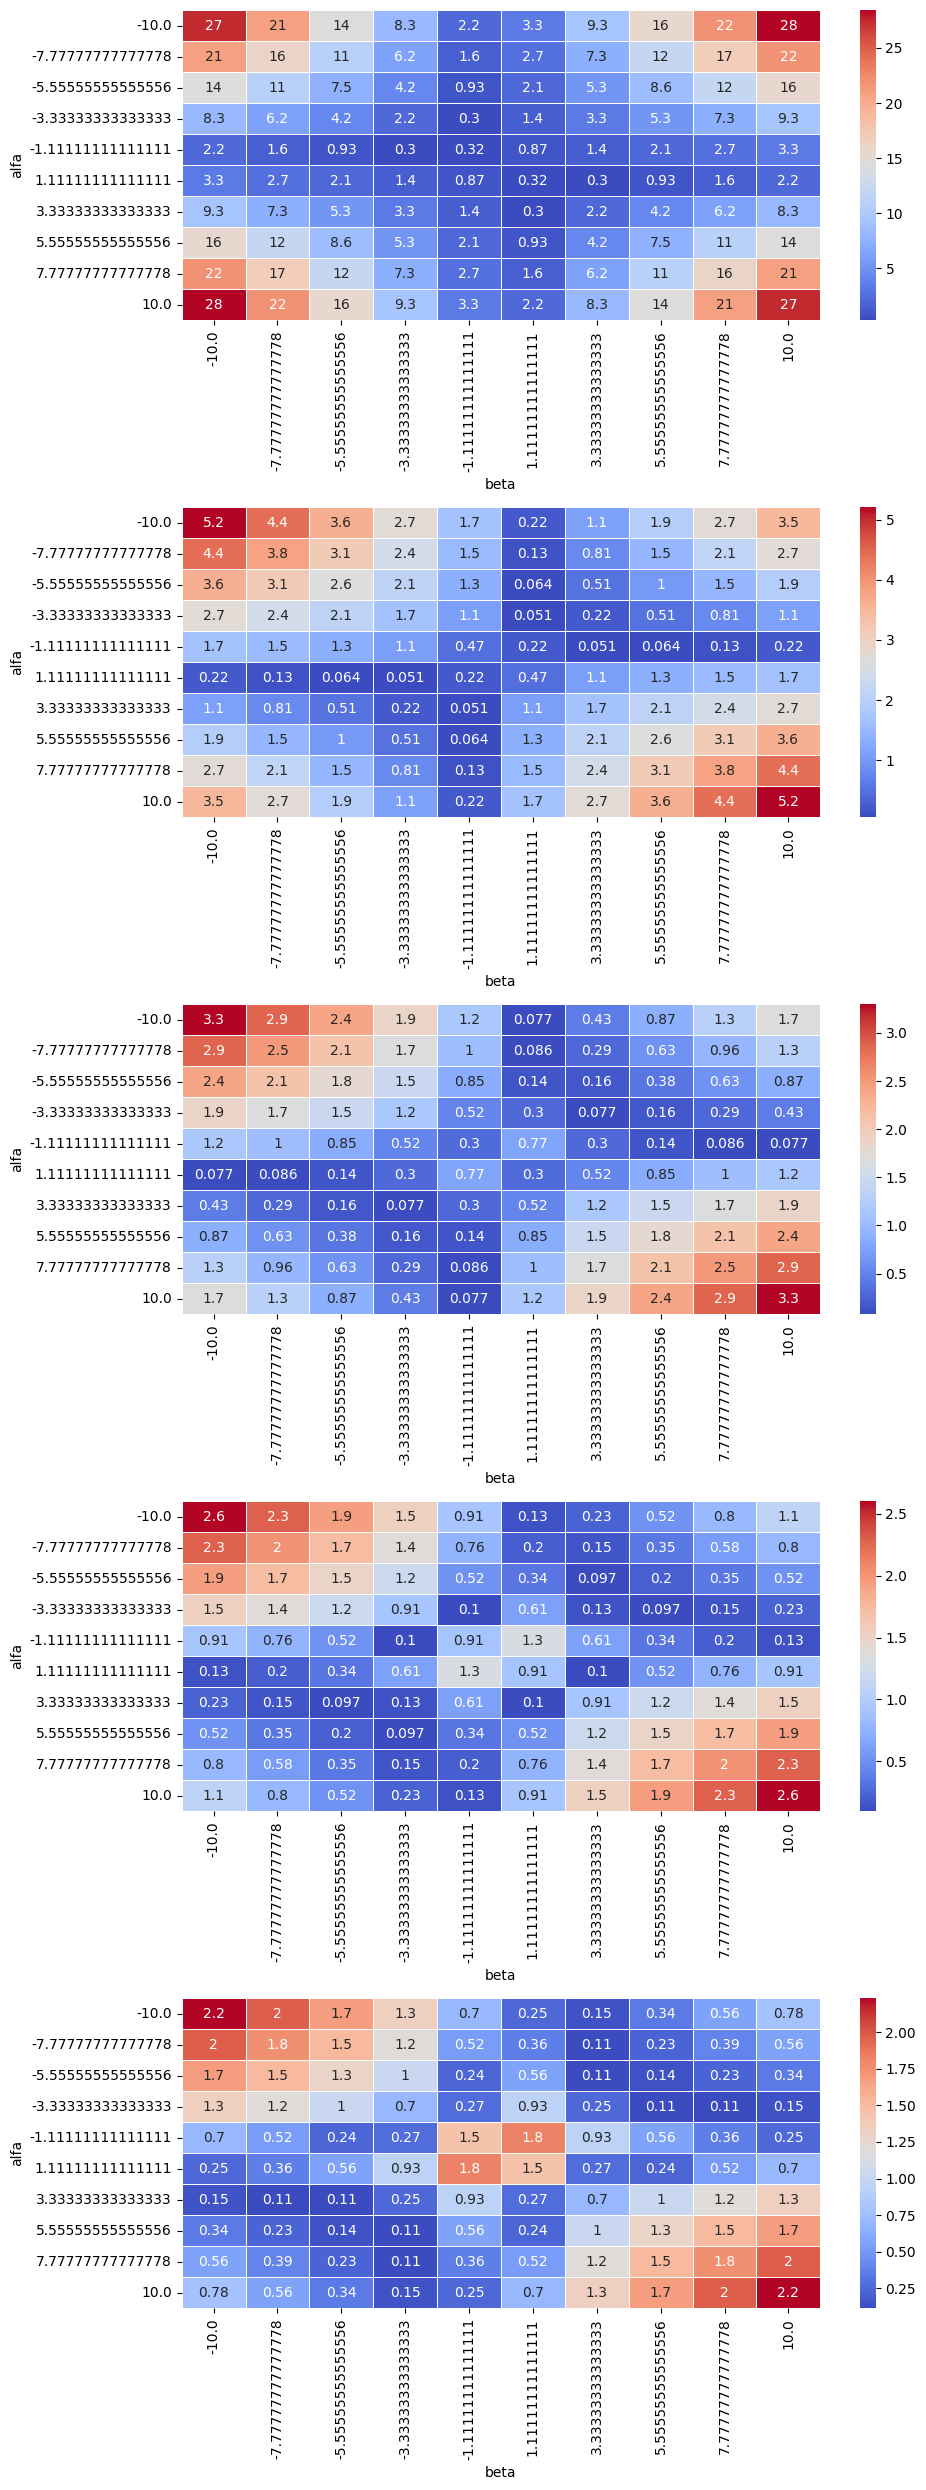

In [17]:
data['mod'] = data['magnitude'].apply(lambda x: x if x >= 0 else -x)

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='mod')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
fig.savefig('magnitude_mod.png')

# Display the plot
plt.show()

In [18]:
# Convert numbers to scientific notation
data['err'] = data['err'].apply(lambda x: '{:.2e}'.format(x))
data['err'] = data['err'].apply(lambda x: float(x.split('e')[1]))
print(data['err'])

data['err_n'] = data['err'] / data['r']

0     -14.0
1     -14.0
2     -14.0
3     -14.0
4     -14.0
       ... 
495   -14.0
496   -14.0
497   -14.0
498   -14.0
499   -14.0
Name: err, Length: 500, dtype: float64


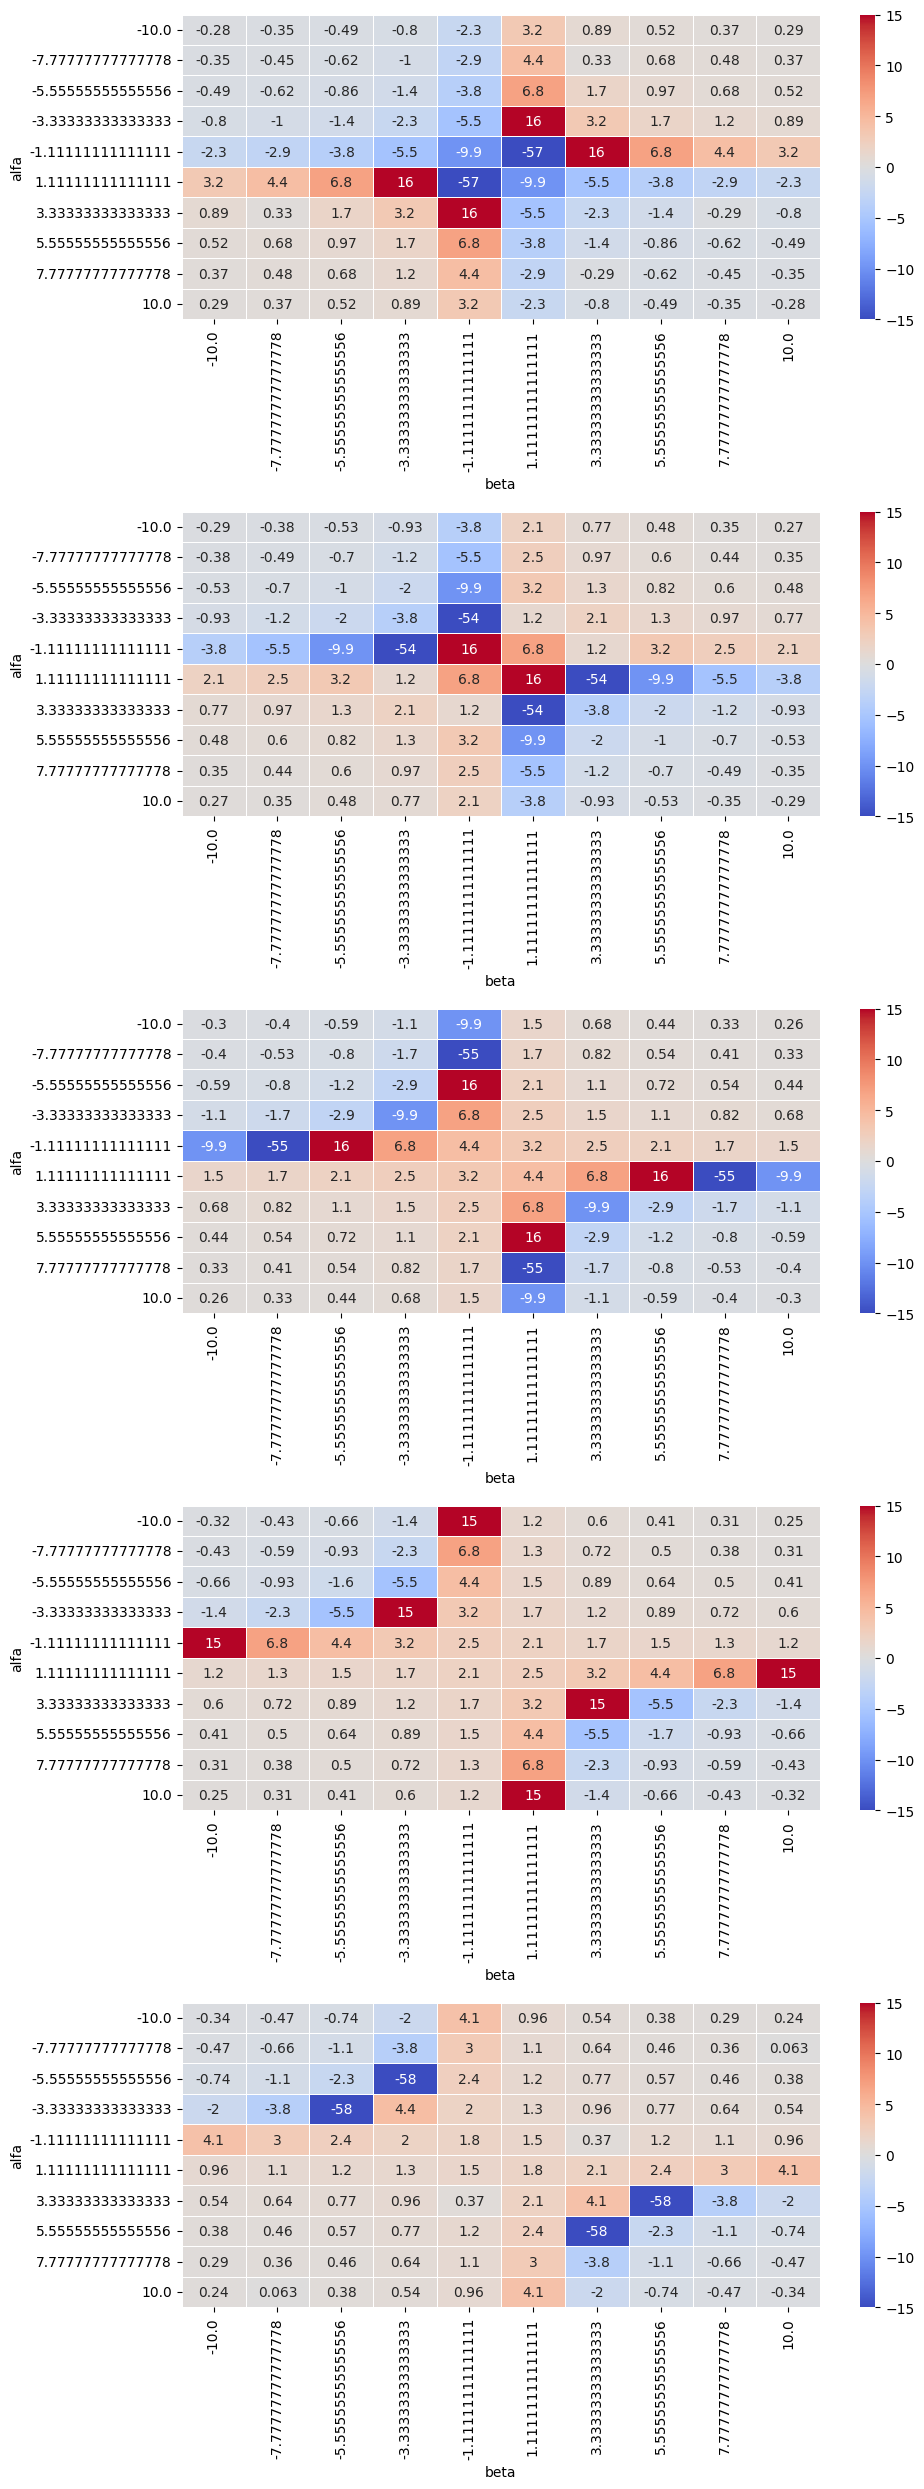

In [19]:
# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='err_n')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i], vmin=-15, vmax=15)
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
fig.savefig('err_n.png')

# Display the plot
plt.show()